## 1. 라이브러리 및 데이터 불러오기

In [3]:
# 분석에 필요한 라이브러리를 불러옵니다.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# base_path = "C:/Users/gmlkd/data/시스템 품질 변화로 인한 사용자 불편 예지 AI 경진대회_data/"
# train_err = pd.read_csv(base_path+"train_err_data.csv")
# train_problem = pd.read_csv(base_path+"train_problem_data.csv")
# train_quality = pd.read_csv(base_path+"train_quality_data.csv")
# test_err = pd.read_csv(base_path+"test_err_data.csv")
# test_quality = pd.read_csv(base_path+"test_quality_data.csv")
# submission = pd.read_csv(base_path+"sample_submission.csv")

C:\Users\gmlkd\AppData\Local\Temp\ipykernel_1396\2401973358.py:4: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  train_quality = pd.read_csv(base_path+"train_quality_data.csv")
C:\Users\gmlkd\AppData\Local\Temp\ipykernel_1396\2401973358.py:6: DtypeWarning: Columns (4,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  test_quality = pd.read_csv(base_path+"test_quality_data.csv")


In [4]:
#결측치 처리 완료된 파일 불러오기

train_err = pd.read_csv("new_train_err.csv", parse_dates=['time'])
train_problem = pd.read_csv("new_train_problem.csv", parse_dates=['time'])
train_quality = pd.read_csv("new_train_quality.csv", parse_dates=['time'])
test_err = pd.read_csv("new_test_err.csv", parse_dates=['time'])
test_quality = pd.read_csv("new_test_quality.csv", parse_dates=['time'])
submission = pd.read_csv("C:/Users/gmlkd/data/시스템 품질 변화로 인한 사용자 불편 예지 AI 경진대회_data/sample_submission.csv")

In [4]:
display(train_err.head(2))
display(test_err.head(2))
display(train_quality.head(2))
display(test_quality.head(2))
display(train_problem.head(2))

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,20201101025616,model_3,05.15.2138,15,1
1,10000,20201101030309,model_3,05.15.2138,12,1


,user_id,time,model_nm,fwver,errtype,errcode
0,30000,20201101030227,model_1,04.16.3553,31,1
1,30000,20201101030227,model_1,04.16.3553,33,2


,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
1,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0


,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,20201128195000,30000,04.33.1261,0.0,0,0.0,0,0,0,0,5,0,0,2,0,0
1,20201128195000,30000,04.33.1261,0.0,0,0.0,0,0,0,0,5,0,0,2,0,0


,user_id,time
0,19224,20201102200000
1,23664,20201116140000


## 2. 데이터 전처리

### 2-1. 결측치 처리

In [5]:
# time column을 datetype으로 변경

train_err['time'] = pd.to_datetime(train_err['time'], format='%Y%m%d%H%M%S')
train_problem['time'] = pd.to_datetime(train_problem['time'], format='%Y%m%d%H%M%S')
train_quality['time'] = pd.to_datetime(train_quality['time'], format='%Y%m%d%H%M%S')
test_err['time'] = pd.to_datetime(test_err['time'], format='%Y%m%d%H%M%S')
test_quality['time'] = pd.to_datetime(test_quality['time'], format='%Y%m%d%H%M%S')

#### train_err

In [6]:
train_err.isnull().sum()

user_id     0
time        0
model_nm    0
fwver       0
errtype     0
errcode     1
dtype: int64

In [7]:
train_err[train_err.errcode.isnull()]

,user_id,time,model_nm,fwver,errtype,errcode
3825744,13639,2020-11-21 19:17:18,model_2,04.33.1261,5,NaN


In [8]:
# errcode 40013일 때와 user_id, time, model_nm, fwver, errtype모두 같다
train_err.iloc[3825742:3825747]

,user_id,time,model_nm,fwver,errtype,errcode
3825742,13639,2020-11-21 17:40:58,model_2,04.33.1261,31,1
3825743,13639,2020-11-21 17:41:10,model_2,04.33.1261,31,0
3825744,13639,2020-11-21 19:17:18,model_2,04.33.1261,5,NaN
3825745,13639,2020-11-21 19:17:18,model_2,04.33.1261,5,40013
3825746,13639,2020-11-21 22:09:19,model_2,04.33.1261,15,1


In [9]:
# 따라서 같은 errcode일 것임을 유추하여 40013값을 넣어준다.
train_err.errcode = train_err.errcode.fillna('40013')

In [10]:
train_err.isnull().sum()

user_id     0
time        0
model_nm    0
fwver       0
errtype     0
errcode     0
dtype: int64

In [11]:
# train_err의 중복값 제거

print(train_err.shape)
train_err = train_err.drop_duplicates(subset=None, keep='first')
print(train_err.shape)

(16554663, 6)
(15368001, 6)


In [12]:
# model_nm, fwver, errcode encoding 필요

train_err.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15368001 entries, 0 to 16554662
Data columns (total 6 columns):
 #   Column    Dtype         
---  ------    -----         
 0   user_id   int64         
 1   time      datetime64[ns]
 2   model_nm  object        
 3   fwver     object        
 4   errtype   int64         
 5   errcode   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 820.7+ MB


#### train_quality

In [13]:
train_quality.isnull().sum()

time               0
user_id            0
fwver          40080
quality_0     144432
quality_1          0
quality_2      40113
quality_3          0
quality_4          0
quality_5         20
quality_6          0
quality_7          0
quality_8          0
quality_9          0
quality_10         0
quality_11         0
quality_12         0
dtype: int64

In [14]:
# 1. fwver 결측치

# case1. fwver=non을 이상치로 판단하고 모두 지우기
# case2. train_err에서 해당 user_id의 fwver값을 가져와 채우기

In [15]:
# train_err에는 fwver가 업그레이드 된 경우가 많이 있다.
# 결측치 비율이 적고, 어떤 fwver에서 로그가 찍혔는지 알기 힘드므로 case1 선택

fwver_null_index = train_quality[train_quality.fwver.isnull()].index

train_quality = train_quality.drop(fwver_null_index, axis=0)
train_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788544 entries, 0 to 828623
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time        788544 non-null  datetime64[ns]
 1   user_id     788544 non-null  int64         
 2   fwver       788544 non-null  object        
 3   quality_0   684192 non-null  float64       
 4   quality_1   788544 non-null  int64         
 5   quality_2   788511 non-null  float64       
 6   quality_3   788544 non-null  int64         
 7   quality_4   788544 non-null  int64         
 8   quality_5   788524 non-null  object        
 9   quality_6   788544 non-null  int64         
 10  quality_7   788544 non-null  object        
 11  quality_8   788544 non-null  object        
 12  quality_9   788544 non-null  object        
 13  quality_10  788544 non-null  object        
 14  quality_11  788544 non-null  int64         
 15  quality_12  788544 non-null  int64         
dtypes:

In [16]:
# 2. quality 결측치

# case1. 최빈값 채우기
# case2. 평균값 채우기

# quality_0
train_quality.quality_0.describe()

count    684192.000000
mean          4.148701
std         479.315029
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      157667.000000
Name: quality_0, dtype: float64

In [17]:
train_quality.quality_0.value_counts()

 0.0       542790
-1.0       130828
 1.0         2097
 2.0         1252
 3.0          518
            ...  
 1113.0         1
 1177.0         1
 1186.0         1
 946.0          1
 2351.0         1
Name: quality_0, Length: 753, dtype: int64

In [18]:
# quality_2
train_quality.quality_2.describe()

count    788511.000000
mean          4.751094
std         586.252469
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      191859.000000
Name: quality_2, dtype: float64

In [19]:
train_quality.quality_2.value_counts()

 0.0        632469
-1.0        144392
 1.0          2937
 2.0          1073
 3.0           580
             ...  
 872.0           1
 11259.0         1
 373.0           1
 8278.0          1
 2351.0          1
Name: quality_2, Length: 798, dtype: int64

In [20]:
# quality_5
train_quality.quality_5.value_counts()

# -1, 0 ,1에 데이터가 편향되어있고, max값과 차이가 많이 나므로 평균보단 최빈값으로?

0         402947
-1        144391
1          55206
2          35399
3          21118
           ...  
10,490         1
10,821         1
12,379         1
14,523         1
9,558          1
Name: quality_5, Length: 4744, dtype: int64

In [21]:
# case1. 최빈값으로 채우기

for i in train_quality.columns[3:]:
    train_quality[i] = train_quality[i].fillna(train_quality[i].mode()[0])

In [22]:
train_quality.isnull().sum()

time          0
user_id       0
fwver         0
quality_0     0
quality_1     0
quality_2     0
quality_3     0
quality_4     0
quality_5     0
quality_6     0
quality_7     0
quality_8     0
quality_9     0
quality_10    0
quality_11    0
quality_12    0
dtype: int64

In [23]:
# train_quality 중복값 제거

print(train_quality.shape)
train_quality = train_quality.drop_duplicates(subset=None, keep='first')
print(train_quality.shape)

(788544, 16)
(272452, 16)


#### test_err

In [24]:
test_err.isnull().sum()

user_id     0
time        0
model_nm    0
fwver       0
errtype     0
errcode     4
dtype: int64

In [25]:
test_err[test_err.errcode.isnull()] 

,user_id,time,model_nm,fwver,errtype,errcode
937967,30820,2020-11-15 04:43:17,model_2,04.33.1261,5,NaN
4038892,33681,2020-11-03 11:02:59,model_2,04.33.1185,5,NaN
9486881,38991,2020-11-27 21:38:38,model_2,04.33.1261,5,NaN
10425473,39894,2020-11-28 14:47:12,model_1,04.16.3553,5,NaN


In [26]:
# 40053으로 채우기
test_err.iloc[937965:937970]

,user_id,time,model_nm,fwver,errtype,errcode
937965,30820,2020-11-15 03:59:00,model_2,04.33.1261,40,1
937966,30820,2020-11-15 03:59:02,model_2,04.33.1261,40,0
937967,30820,2020-11-15 04:43:17,model_2,04.33.1261,5,NaN
937968,30820,2020-11-15 04:43:17,model_2,04.33.1261,5,40053
937969,30820,2020-11-15 09:10:24,model_2,04.33.1261,15,1


In [27]:
# 40053으로 채우기
test_err.iloc[4038890:4038895]

,user_id,time,model_nm,fwver,errtype,errcode
4038890,33681,2020-11-03 11:01:47,model_2,04.33.1185,14,14
4038891,33681,2020-11-03 11:02:59,model_2,04.33.1185,7,14
4038892,33681,2020-11-03 11:02:59,model_2,04.33.1185,5,NaN
4038893,33681,2020-11-03 11:02:59,model_2,04.33.1185,5,40053
4038894,33681,2020-11-03 11:03:00,model_2,04.33.1185,6,14


In [28]:
# 40053으로 채우기
test_err.iloc[9486879:9486883]

,user_id,time,model_nm,fwver,errtype,errcode
9486879,38991,2020-11-27 18:59:52,model_2,04.33.1261,5,B-A8002
9486880,38991,2020-11-27 21:38:38,model_2,04.33.1261,5,40053
9486881,38991,2020-11-27 21:38:38,model_2,04.33.1261,5,NaN
9486882,38991,2020-11-28 00:13:46,model_2,04.33.1261,26,1


In [29]:
# -1010으로 채우기
test_err.iloc[10425470:10425475]

,user_id,time,model_nm,fwver,errtype,errcode
10425470,39894,2020-11-28 14:46:05,model_1,04.16.3553,20,1
10425471,39894,2020-11-28 14:46:21,model_1,04.16.3553,26,1
10425472,39894,2020-11-28 14:47:12,model_1,04.16.3553,5,-1010
10425473,39894,2020-11-28 14:47:12,model_1,04.16.3553,5,NaN
10425474,39894,2020-11-28 14:47:57,model_1,04.16.3553,32,80


In [30]:
# 결측치 채우기
test_err.iloc[937967, 5] = '40053'
test_err.iloc[4038892, 5] = '40053'
test_err.iloc[9486881, 5] = '40053'
test_err.iloc[10425473, 5] = '-1010'

In [31]:
test_err.isnull().sum()

user_id     0
time        0
model_nm    0
fwver       0
errtype     0
errcode     0
dtype: int64

In [32]:
# test_err 중복값 제거

print(test_err.shape)
test_err = test_err.drop_duplicates(subset=None, keep='first')
print(test_err.shape)

(16532648, 6)
(15527221, 6)


#### test_quality

In [33]:
test_quality.isnull().sum()

time               0
user_id            0
fwver          22764
quality_0     106584
quality_1         11
quality_2      21115
quality_3          0
quality_4          0
quality_5         44
quality_6          0
quality_7          0
quality_8          0
quality_9          0
quality_10         0
quality_11         0
quality_12         0
dtype: int64

In [34]:
# fwver결측치 제거

fwver_null_index = list(test_quality[test_quality.fwver.isnull()].index)

test_quality = test_quality.drop(fwver_null_index, axis=0)
test_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725208 entries, 0 to 747971
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time        725208 non-null  datetime64[ns]
 1   user_id     725208 non-null  int64         
 2   fwver       725208 non-null  object        
 3   quality_0   639780 non-null  float64       
 4   quality_1   725197 non-null  object        
 5   quality_2   725177 non-null  float64       
 6   quality_3   725208 non-null  int64         
 7   quality_4   725208 non-null  int64         
 8   quality_5   725164 non-null  object        
 9   quality_6   725208 non-null  int64         
 10  quality_7   725208 non-null  object        
 11  quality_8   725208 non-null  object        
 12  quality_9   725208 non-null  object        
 13  quality_10  725208 non-null  object        
 14  quality_11  725208 non-null  int64         
 15  quality_12  725208 non-null  int64         
dtypes:

In [35]:
# quality_0 ~ 12 최빈값으로 채우기

for i in test_quality.columns[3:]:
    test_quality[i] = test_quality[i].fillna(test_quality[i].mode()[0])

In [36]:
test_quality.isnull().sum()

time          0
user_id       0
fwver         0
quality_0     0
quality_1     0
quality_2     0
quality_3     0
quality_4     0
quality_5     0
quality_6     0
quality_7     0
quality_8     0
quality_9     0
quality_10    0
quality_11    0
quality_12    0
dtype: int64

In [37]:
# test_quality 중복값 제거

print(test_quality.shape)
test_quality = test_quality.drop_duplicates(subset=None, keep='first')
print(test_quality.shape)

(725208, 16)
(237629, 16)


#### train_problem

In [38]:
train_problem.isnull().sum()

user_id    0
time       0
dtype: int64

### 2-2. encoding
#### quality_0~12 String to Int

In [39]:
# train/test_quality에서 쉼표로 인해 string형이 된  data 변경

def strToInt(x):
    if type(x) == str:
        x = x.replace(",", "")
        x = int(x)
        return x
    else:
        x = int(x)
        return x

In [40]:
# train_quality
for i in train_quality.columns[3:]:
    train_quality[i] = train_quality[i].apply(lambda x: strToInt(x))
    
# test_quality
for i in test_quality.columns[3:]:
    test_quality[i] = test_quality[i].apply(lambda x: strToInt(x))

In [41]:
train_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272452 entries, 0 to 828623
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time        272452 non-null  datetime64[ns]
 1   user_id     272452 non-null  int64         
 2   fwver       272452 non-null  object        
 3   quality_0   272452 non-null  int64         
 4   quality_1   272452 non-null  int64         
 5   quality_2   272452 non-null  int64         
 6   quality_3   272452 non-null  int64         
 7   quality_4   272452 non-null  int64         
 8   quality_5   272452 non-null  int64         
 9   quality_6   272452 non-null  int64         
 10  quality_7   272452 non-null  int64         
 11  quality_8   272452 non-null  int64         
 12  quality_9   272452 non-null  int64         
 13  quality_10  272452 non-null  int64         
 14  quality_11  272452 non-null  int64         
 15  quality_12  272452 non-null  int64         
dtypes:

In [42]:
test_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237629 entries, 0 to 747967
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time        237629 non-null  datetime64[ns]
 1   user_id     237629 non-null  int64         
 2   fwver       237629 non-null  object        
 3   quality_0   237629 non-null  int64         
 4   quality_1   237629 non-null  int64         
 5   quality_2   237629 non-null  int64         
 6   quality_3   237629 non-null  int64         
 7   quality_4   237629 non-null  int64         
 8   quality_5   237629 non-null  int64         
 9   quality_6   237629 non-null  int64         
 10  quality_7   237629 non-null  int64         
 11  quality_8   237629 non-null  int64         
 12  quality_9   237629 non-null  int64         
 13  quality_10  237629 non-null  int64         
 14  quality_11  237629 non-null  int64         
 15  quality_12  237629 non-null  int64         
dtypes:

In [43]:
# 결측치 처리 완료된 dataframe 저장

train_err.to_csv('new_train_err.csv', index=False)
train_quality.to_csv('new_train_quality.csv', index=False)
train_problem.to_csv('new_train_problem.csv', index=False)
test_err.to_csv('new_test_err.csv', index=False)
test_quality.to_csv('new_test_quality.csv', index=False)

## 2-2. 데이터 분석

In [44]:
train_err.head()

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,2020-11-01 02:56:16,model_3,05.15.2138,15,1
1,10000,2020-11-01 03:03:09,model_3,05.15.2138,12,1
2,10000,2020-11-01 03:03:09,model_3,05.15.2138,11,1
3,10000,2020-11-01 05:05:14,model_3,05.15.2138,16,1
4,10000,2020-11-01 05:05:15,model_3,05.15.2138,4,0


### 시간대별 분석

#### train_err

In [45]:
# 일별 에러 발생

# 비교적 주말에 에러가 많이 발생했다.
train_err.time.dt.day.value_counts()

21    562283
22    556151
15    554778
1     553561
7     551177
8     541958
28    527480
29    525630
14    520291
19    518417
6     516747
2     513572
23    513511
24    509559
9     507302
18    506377
5     502597
20    501508
26    499517
12    497408
10    497012
3     496842
27    492887
16    492638
25    492618
4     489363
11    488927
30    484872
17    483993
13    469020
31         5
Name: time, dtype: int64

In [46]:
# 11월 1일로 들어가도 될 것같다.
train_err[train_err.time.dt.day == 31]

,user_id,time,model_nm,fwver,errtype,errcode
6409135,15801,2020-10-31 23:59:59,model_0,04.22.1750,16,1
9204586,18418,2020-10-31 23:59:59,model_0,04.22.1750,26,1
12134438,20974,2020-10-31 23:59:59,model_0,04.22.1750,26,1
13424899,22249,2020-10-31 23:59:59,model_0,04.22.1750,26,1
13585684,22385,2020-10-31 23:59:59,model_2,04.33.1185,26,1


<AxesSubplot:xlabel='time', ylabel='Count'>

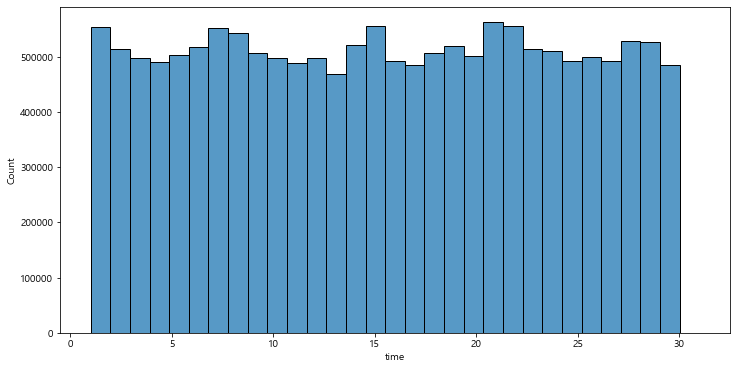

In [47]:
plt.figure(figsize=(12,6))
sns.histplot(data=train_err, x=train_err.time.dt.day, bins=31)

In [48]:
# 시간대별 에러발생
train_err.time.dt.hour.value_counts()

19    824162
20    792258
21    791873
18    783808
22    729112
17    713929
8     677857
0     658982
2     648567
16    647170
3     645580
4     643244
9     637959
23    622782
7     618374
13    603780
15    600263
12    592900
10    592178
14    581045
11    575142
5     519059
6     444071
1     423906
Name: time, dtype: int64

<AxesSubplot:xlabel='time', ylabel='Count'>

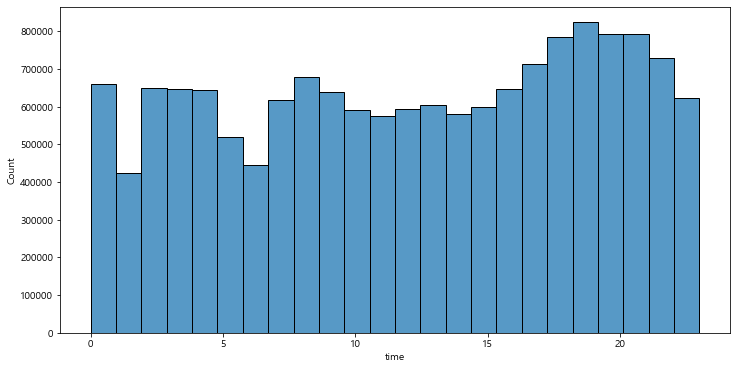

In [49]:
plt.figure(figsize=(12,6))
sns.histplot(data=train_err, x=train_err.time.dt.hour, bins=24)

#### train_problem 

In [50]:
# 요일별 불만 제기 수

train_problem.time.dt.day_of_week.value_counts()

0    1332
2     868
4     853
1     809
3     809
5     431
6     327
Name: time, dtype: int64

<AxesSubplot:xlabel='time', ylabel='Count'>

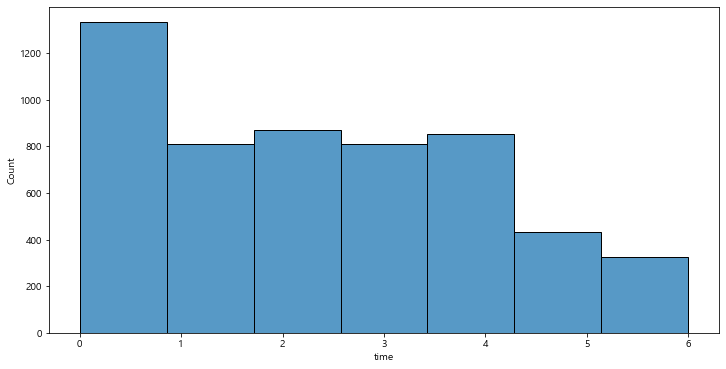

In [51]:
# 주말에 에러가 많이 발생하지만 불만 제기는 월요일이 가장 많다.
# 주말에는 고객센터가 문을 열지 않을 것이라 생각했을 수 있다.

plt.figure(figsize=(12,6))
sns.histplot(data=train_problem, x=train_problem.time.dt.day_of_week, bins=7)

In [52]:
# 시간대별 불만 제기 수
train_problem.time.dt.hour.value_counts()

12    627
11    600
13    518
19    507
18    492
15    489
16    460
17    432
22    233
20    233
14    228
21    204
23    175
0     108
1      67
2      15
10     14
9       8
5       5
8       5
3       4
4       3
7       1
6       1
Name: time, dtype: int64

<AxesSubplot:xlabel='time', ylabel='Count'>

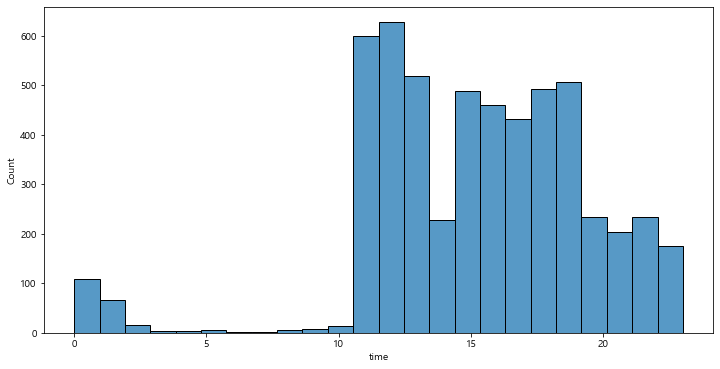

In [53]:
plt.figure(figsize=(12,6))
sns.histplot(data=train_problem, x=train_problem.time.dt.hour, bins=24)

- 에러가 발생한 요일, 시간대는 큰 차이가 나지 않는다.
- 하지만 불만을 제기한 요일과 시간대는 꽤 유의미한 차이가 난다.
- 따라서 에러가 발생한 요일, 시간은 trian set에 넣어도 될 것 같다.

### model_nm 분석

#### model_nm에 따른 불만율

In [54]:
train_err.model_nm.unique()

array(['model_3', 'model_2', 'model_0', 'model_1', 'model_7', 'model_4',
       'model_5', 'model_8', 'model_6'], dtype=object)

In [55]:
problem_id_list = list(train_problem.user_id)

In [56]:
len(problem_id_list)

5429

In [57]:
id_model = train_err.groupby('model_nm')['user_id'].unique().to_frame()
id_model

,user_id
model_nm,
model_0,"[10004, 10005, 10007, 10008, 10011, 10013, 100..."
model_1,"[10006, 10009, 10010, 10021, 10023, 10031, 100..."
model_2,"[10001, 10003, 10006, 10012, 10014, 10017, 100..."
model_3,"[10000, 10002, 10016, 10018, 10019, 10026, 100..."
model_4,"[10080, 10092, 10167, 10168, 10171, 10206, 102..."
model_5,"[10110, 10408, 10411, 10600, 10719, 11058, 119..."
model_6,"[10495, 10693, 11157, 11183, 11206, 11319, 114..."
model_7,"[10075, 10244, 10556, 10694, 10744, 10922, 111..."
model_8,"[10202, 10286, 10458, 10690, 11086, 11416, 114..."


In [58]:
id_model['count'] = 0

In [59]:
id_model.iloc[0]

user_id    [10004, 10005, 10007, 10008, 10011, 10013, 100...
count                                                      0
Name: model_0, dtype: object

In [60]:
for i in range(len(id_model.index)):
    for j in problem_id_list:
        if j in id_model.iloc[i, 0]:
            id_model.iloc[i, 1] += 1

In [61]:
id_model

,user_id,count
model_nm,,
model_0,"[10004, 10005, 10007, 10008, 10011, 10013, 100...",1769
model_1,"[10006, 10009, 10010, 10021, 10023, 10031, 100...",1426
model_2,"[10001, 10003, 10006, 10012, 10014, 10017, 100...",1918
model_3,"[10000, 10002, 10016, 10018, 10019, 10026, 100...",789
model_4,"[10080, 10092, 10167, 10168, 10171, 10206, 102...",153
model_5,"[10110, 10408, 10411, 10600, 10719, 11058, 119...",23
model_6,"[10495, 10693, 11157, 11183, 11206, 11319, 114...",10
model_7,"[10075, 10244, 10556, 10694, 10744, 10922, 111...",36
model_8,"[10202, 10286, 10458, 10690, 11086, 11416, 114...",25


In [62]:
count_sum = id_model['count'].values.sum()
count_sum

6149

In [63]:
id_model['problem_rate'] = id_model['count'] / count_sum * 100
id_model

,user_id,count,problem_rate
model_nm,,,
model_0,"[10004, 10005, 10007, 10008, 10011, 10013, 100...",1769,28.768906
model_1,"[10006, 10009, 10010, 10021, 10023, 10031, 100...",1426,23.190763
model_2,"[10001, 10003, 10006, 10012, 10014, 10017, 100...",1918,31.192064
model_3,"[10000, 10002, 10016, 10018, 10019, 10026, 100...",789,12.831355
model_4,"[10080, 10092, 10167, 10168, 10171, 10206, 102...",153,2.488209
model_5,"[10110, 10408, 10411, 10600, 10719, 11058, 119...",23,0.374045
model_6,"[10495, 10693, 11157, 11183, 11206, 11319, 114...",10,0.162628
model_7,"[10075, 10244, 10556, 10694, 10744, 10922, 111...",36,0.585461
model_8,"[10202, 10286, 10458, 10690, 11086, 11416, 114...",25,0.406570


In [64]:
id_model['error_rate'] = train_err.model_nm.value_counts().sort_index() / train_err.model_nm.value_counts().sum() * 100

In [65]:
id_model

,user_id,count,problem_rate,error_rate
model_nm,,,,
model_0,"[10004, 10005, 10007, 10008, 10011, 10013, 100...",1769,28.768906,26.026404
model_1,"[10006, 10009, 10010, 10021, 10023, 10031, 100...",1426,23.190763,34.416356
model_2,"[10001, 10003, 10006, 10012, 10014, 10017, 100...",1918,31.192064,21.419331
model_3,"[10000, 10002, 10016, 10018, 10019, 10026, 100...",789,12.831355,11.987284
model_4,"[10080, 10092, 10167, 10168, 10171, 10206, 102...",153,2.488209,5.512259
model_5,"[10110, 10408, 10411, 10600, 10719, 11058, 119...",23,0.374045,0.192302
model_6,"[10495, 10693, 11157, 11183, 11206, 11319, 114...",10,0.162628,0.011114
model_7,"[10075, 10244, 10556, 10694, 10744, 10922, 111...",36,0.585461,0.216300
model_8,"[10202, 10286, 10458, 10690, 11086, 11416, 114...",25,0.406570,0.218649


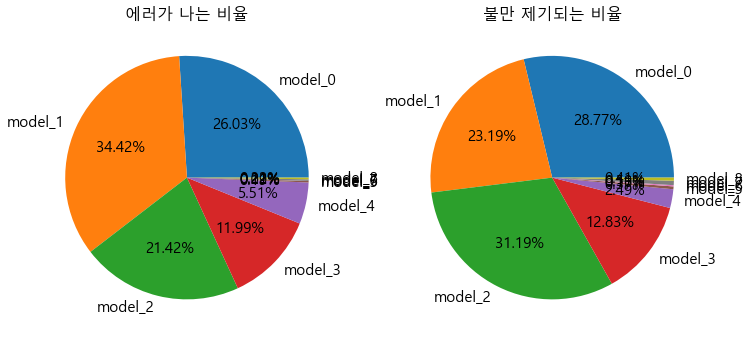

In [66]:
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.title('에러가 나는 비율', fontsize=16)
plt.pie(id_model['error_rate'], labels=id_model.index, autopct='%.2f%%', textprops={'fontsize':15})

plt.subplot(122)
plt.title('불만 제기되는 비율', fontsize=16)
plt.pie(id_model['problem_rate'], labels=id_model.index, autopct='%.2f%%', textprops={'fontsize':15})
plt.show()

- 에러는 model_1  > model_0 > model_2 순서로 많지만
- 해당 에러로 불만을 제기하는 사용자는 model_2 > model_0 > model_1 순서
- 모델에 따라 불만 제기 확률 편차가 크기 때문에 model_nm은 유의미한 column

#### model_nm 변경

In [102]:
change_model =  train_err[['user_id', 'model_nm']]

In [101]:
change_model = change_model.drop_duplicates(subset=None, keep='first')

In [88]:
user_model_num = change_model.user_id.value_counts()
user_has_2models = list(user_model_num.loc[user_model_num > 1].to_frame().index)

In [184]:
user_sum = len(user_has_2models)
user_prob_sum = len(list(train_problem[train_problem['user_id'].isin(user_has_2models)].user_id.unique()))

print(f"모델이 변경되고 불만을 제기한 사람 {user_prob_sum/user_sum*100}% ")

모델이 변경되고 불만을 제기한 사람 91.4651493598862% 


- model_nm 변경이 불만 제기에 많은 영향을 미친다

#### model_nm - fwver

In [72]:
model_fwver = train_err.groupby('model_nm')['fwver'].unique().to_frame().reset_index()
model_fwver

,model_nm,fwver
0,model_0,"[04.22.1750, 04.22.1778, 04.22.1684, 04.22.166..."
1,model_1,"[04.16.3553, 04.16.3571, 04.16.3439, 04.16.356..."
2,model_2,"[04.33.1185, 04.33.1261, 04.33.1149, 04.33.117..."
3,model_3,"[05.15.2138, 05.15.2120, 05.15.2090, 05.15.310..."
4,model_4,"[03.11.1149, 03.11.1167, 03.11.1141]"
5,model_5,"[04.82.1684, 04.82.1778, 04.82.1730]"
6,model_6,"[10, 8.5.3]"
7,model_7,"[05.66.3237, 05.66.3571]"
8,model_8,"[04.73.2237, 04.73.2571]"


In [27]:
# model_6를 제외하고 모델별로 4번째까지 같은 펌웨어 번호를 사용한다.

for nm in range(len(model_fwver.index)):
    print(f"{model_fwver.index[nm]} -> \n {sorted(model_fwver.iloc[nm][0])}")

model_0 -> 
 ['04.22.1442', '04.22.1656', '04.22.1666', '04.22.1684', '04.22.1750', '04.22.1778']
model_1 -> 
 ['04.16.2641', '04.16.3345', '04.16.3439', '04.16.3553', '04.16.3569', '04.16.3571']
model_2 -> 
 ['04.33.1095', '04.33.1125', '04.33.1149', '04.33.1171', '04.33.1185', '04.33.1261']
model_3 -> 
 ['05.15.2090', '05.15.2092', '05.15.2114', '05.15.2120', '05.15.2122', '05.15.2138', '05.15.3104']
model_4 -> 
 ['03.11.1141', '03.11.1149', '03.11.1167']
model_5 -> 
 ['04.82.1684', '04.82.1730', '04.82.1778']
model_6 -> 
 ['10', '8.5.3']
model_7 -> 
 ['05.66.3237', '05.66.3571']
model_8 -> 
 ['04.73.2237', '04.73.2571']


- model과 fwver은 관련성이 높다 -> fwver만 사용해도 될지?

### fwver 분석

#### fwver에 따른 불만율

In [114]:
fwver_df = train_err[['user_id', 'fwver']]

In [118]:
fwver_df = fwver_df.drop_duplicates(subset=None, keep='first')

,user_id,fwver
0,10000,05.15.2138
316,10001,04.33.1185
684,10001,04.33.1261
2661,10002,05.15.2138
2966,10003,04.33.1185
...,...,...
15366473,24997,04.22.1750
15366933,24997,04.22.1778
15367291,24998,04.22.1750
15367299,24998,04.22.1778


In [129]:
user_fwver = fwver_df.groupby('fwver')['user_id'].unique().to_frame().reset_index()

,fwver,user_id
0,03.11.1141,"[13383, 14319]"
1,03.11.1149,"[10080, 12659, 14956, 16535, 23098, 24175]"
2,03.11.1167,"[10092, 10167, 10168, 10171, 10206, 10207, 102..."
3,04.16.2641,[21965]
4,04.16.3345,"[23726, 23860]"
5,04.16.3439,"[14840, 15345, 15950, 16920, 20813, 21638]"
6,04.16.3553,"[10006, 10009, 10010, 10021, 10023, 10031, 100..."
7,04.16.3569,"[17036, 19373]"
8,04.16.3571,"[10023, 10050, 10082, 10102, 10119, 10133, 101..."
9,04.22.1442,"[14958, 23842]"


In [158]:
for i in range(37):
    user_fwver['count'][i] = len(list(train_problem[train_problem['user_id'].isin(user_fwver.user_id[i])].user_id.unique()))


C:\Users\gmlkd\AppData\Local\Temp\ipykernel_13560\22580806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_fwver['count'][i] = len(list(train_problem[train_problem['user_id'].isin(user_fwver.user_id[i])].user_id.unique()))


In [153]:
user_fwver['rate'] = 0

In [156]:
for i in range(37):
        user_fwver['rate'][i] = round(user_fwver['count'][i]/len(user_fwver.user_id[i]) * 100, 2)

In [159]:
user_fwver

,fwver,user_id,count,rate
0,03.11.1141,"[13383, 14319]",1,50.00
1,03.11.1149,"[10080, 12659, 14956, 16535, 23098, 24175]",0,0.00
2,03.11.1167,"[10092, 10167, 10168, 10171, 10206, 10207, 102...",141,20.64
3,04.16.2641,[21965],1,100.00
4,04.16.3345,"[23726, 23860]",1,50.00
5,04.16.3439,"[14840, 15345, 15950, 16920, 20813, 21638]",2,33.33
6,04.16.3553,"[10006, 10009, 10010, 10021, 10023, 10031, 100...",1314,46.32
7,04.16.3569,"[17036, 19373]",2,100.00
8,04.16.3571,"[10023, 10050, 10082, 10102, 10119, 10133, 101...",295,58.76
9,04.22.1442,"[14958, 23842]",1,50.00


<AxesSubplot:xlabel='fwver', ylabel='rate'>

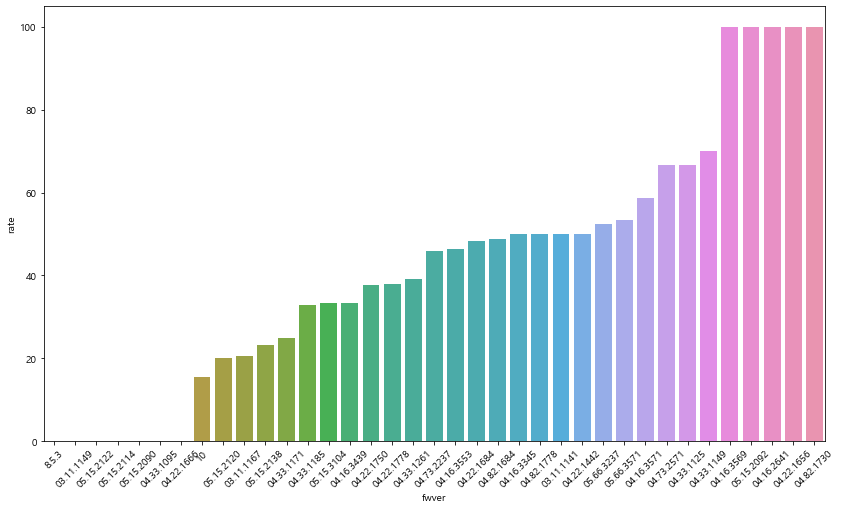

In [176]:
plt.figure(figsize=(14,8))
plt.xticks(rotation=45)
sns.barplot(data=user_fwver, x='fwver', y='rate', order=user_fwver.sort_values('rate').fwver)

- fwver에 따라 불만율 차이가 많이 난다

#### fwver업데이트

In [177]:
# fwver이 바뀌는 user가 많다. 
# fwver이 변경되었을 때 불만 제기율 확인
# fwver_df 사용
fwver_df

,user_id,fwver
0,10000,05.15.2138
316,10001,04.33.1185
684,10001,04.33.1261
2661,10002,05.15.2138
2966,10003,04.33.1185
...,...,...
15366473,24997,04.22.1750
15366933,24997,04.22.1778
15367291,24998,04.22.1750
15367299,24998,04.22.1778


In [182]:
user_fwver_num = fwver_df['user_id'].value_counts()
user_has_2fwvers = list(user_sum.loc[user_sum>1].to_frame().index)

In [185]:
user_sum = len(user_has_2fwvers)
user_prob_sum =  len(list(train_problem[train_problem['user_id'].isin(user_has_2fwvers)].user_id.unique()))

print(f"fwver가 변경되고 불만을 제기한 사람 {user_prob_sum/user_sum*100}% ")

fwver가 변경되고 불만을 제기한 사람 39.696969696969695% 


- fwver이 변경되었을 때 변수가 유의미하게 작용한다.

### Quality 분석

In [192]:
train_quality.describe()

,user_id,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
count,272452.000000,272452.000000,272452.000000,272452.000000,272452.0,272452.0,272452.000000,272452.000000,272452.000000,272452.000000,272452.000000,2.724520e+05,272452.000000,272452.000000
mean,17559.687732,10.786660,-0.068684,14.158138,0.0,0.0,224.519387,3.069664,26.486376,0.177411,106.522925,1.828710e+03,-0.092328,0.038238
std,4389.671541,759.517259,0.796227,997.273716,0.0,0.0,3969.392409,34.457646,295.315129,6.319490,4576.446638,2.441835e+04,0.333191,0.296846
min,10000.000000,-1.000000,-1.000000,-1.000000,0.0,0.0,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.000000,0.000000
25%,13676.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+00,0.000000,0.000000
50%,17488.000000,0.000000,0.000000,0.000000,0.0,0.0,2.000000,0.000000,0.000000,0.000000,0.000000,1.900000e+01,0.000000,0.000000
75%,21546.000000,0.000000,0.000000,0.000000,0.0,0.0,15.000000,0.000000,0.000000,0.000000,0.000000,2.020000e+02,0.000000,0.000000
max,24997.000000,157667.000000,171.000000,191859.000000,0.0,0.0,637385.000000,600.000000,7200.000000,1317.000000,397424.000000,1.910175e+06,14.000000,14.000000


<AxesSubplot:>

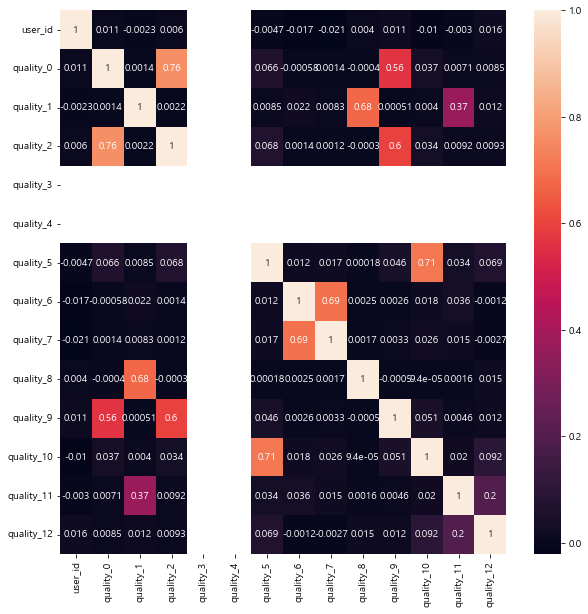

In [199]:
plt.figure(figsize=(10,10))
sns.heatmap(train_quality.corr(), annot=True)

## 2-3. 이상치 검출

1) IQR(Inter-Quantile Range)


2) Outlier Detection method (e.g. Isolation Forest)

## 3. 예측 모델 구현

In [69]:
# 모델을 불러옵니다


In [70]:
# 학습에 필요한 데이터셋을 만듭니다


In [71]:
# 학습 및 모델 검증을 위해 KFold Cross Validation 기법을 사용합니다.


In [72]:
# training

In [73]:
# submission 파일 생성